In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree


from pandas.api.types import is_numeric_dtype, is_bool_dtype
from mlxtend.frequent_patterns import apriori, association_rules


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your team
* Joshua Finch
* Kyle Ormonde
* Ingrid Moe

# Task 1: Dataset
The first step is to find your own domain-specific dataset for your data mining project. The dataset should be complex enough so that it is not straightforward to find patterns with simple calculations (impossible without preprocessing and data mining approaches). There is no limit in size for the dataset, but typically a good sized data for mining is around 100k-100M. Minimum of 100k samples/rows and minimum of 100 attributes/columns. 

It could have thousands/millions rows (or columns or sometimes both rows/columns). A good data typically contains various types of data (numerical, nominal, ordinal, Boolean etc) with some errors (missing or dirty values etc) in the data. The dataset could be text data, tabular formatted data, georeferenced data. See possible data sources: Kaggle repository (https://www.kaggle.com/datasets).

In [2]:
# import dataset(s) into pandas and print samples.

# 1, 10, or 100
data_percent = 1

if data_percent == 1:
    fpath = '/kaggle/input/us-accidents-march23-df1/US_Accidents_March23_df1.csv'
elif data_percent == 10:
    fpath = '/kaggle/input/us-accidents-march23-df10/US_Accidents_March23_df10.csv'
elif data_percent == 100:
    fpath = '/kaggle/input/us-accidents/US_Accidents_March23.csv'

#~~~ full run ~~~
# df = pd.read_csv(fpath, header=0)

#~~~ exl null lat/long ~~~
df = pd.read_csv(fpath, header=0, na_values=['nan']).dropna()

In [3]:
# Print sample rows
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-4169922,Source1,2,2022-12-21 09:02:00,2022-12-21 10:21:40,34.289223,-118.226219,34.293250,-118.233746,0.512,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-6003637,Source1,2,2021-10-07 00:37:00,2021-10-07 09:22:08,34.168714,-117.457098,34.154324,-117.474498,1.406,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-4104031,Source1,2,2022-10-11 04:04:00,2022-10-11 04:24:00,30.448455,-85.890184,30.449426,-85.893223,0.193,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-6769366,Source1,2,2020-10-29 19:40:05,2020-10-29 21:58:06,37.138233,-93.309881,37.138253,-93.310975,0.060,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-7013718,Source1,2,2020-05-07 11:44:13,2020-05-07 12:14:13,41.548000,-73.588800,41.548000,-73.588800,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
cat_data = df

# for col in df.columns:
for col in cat_data.columns:
    if is_numeric_dtype(cat_data[col]) == False or is_bool_dtype(cat_data[col]) == True:
        print(f"Column: {col}")
        print("-" * 30)  # Separator

        # Get the value counts and sort by count 
        value_counts = cat_data[col].value_counts().sort_values(ascending=False)

        # Print the top 10 categories (you can adjust the number as needed)
        for category, count in value_counts.head(5).items():
            print(f"{category}: {count}")

        print("\n")  # Add a blank line between columns

Column: ID
------------------------------
A-4169922: 1
A-7031312: 1
A-3861080: 1
A-4934631: 1
A-6513296: 1


Column: Source
------------------------------
Source1: 35546


Column: Start_Time
------------------------------
2021-02-16 06:42:43: 4
2021-06-08 12:21:00: 3
2022-07-04 15:07:29: 3
2020-11-24 21:34:00: 3
2021-01-26 16:17:33: 3


Column: End_Time
------------------------------
2021-12-07 16:33:00: 3
2021-12-10 20:39:01: 3
2022-07-04 16:22:31: 3
2021-09-30 17:12:08: 2
2022-07-05 02:16:29: 2


Column: Description
------------------------------
A crash has occurred causing no to minimum delays. Use caution.: 89
Accident: 67
An unconfirmed report of a crash has been received. Use caution.: 38
A disabled vehicle is creating a hazard causing no to minimum delays. Use caution.: 31
A crash has occurred use caution.: 29


Column: Street
------------------------------
I-95 N: 376
I-5 N: 361
I-95 S: 349
I-5 S: 305
I-10 E: 265


Column: City
------------------------------
Miami: 1417
Los An

*Say something meaningful about your dataset. For example: Why did you select it? Is there anything interesting or special about it? What do or did hope to learn from it?*

# Data Set Overview
## What is it?
This dataset is a countrywide car accident dataset that covers 49 states of the USA from February 2016 to March 2023 containing 7.7 million records.

## Points of Interest:
The dataset contains a broad spectrum of information regarding all aspects of car accidents such as length of the road affected by the accident, duration, time, and severity. It also contains highly detailed weather data such as temperature, wind direction, wind speed, and precipitation. Additionally, the data set categorises different configurations of roads such as if they contain a give-way, a railway, roundabouts, junctions, etc.

## Learning Goals:
The owner of this dataset has hopes that it can be used for a vast amount applications such as real-time accident prediction, studying accident hotspot locations, casualty analysis and potentially even identifying cause and effect rules to predict accidents.(Sobhan Moosavi, January 2021)
We hope to be able to identify which combination of driving conditions, outside of the obvious ones, are more likely to result in an accident in order to know what to be more aware of.

# Task 2: business scenarios
*List one or more possible questions you would like to investigate using your dataset. You may start this project with one set of questions but (after exploring the dataset) finish with a new set of questions and answers.*

## Accident Analysis

### Time
1. **Annual**: When is the most and least likely times for an accident to occur per year?
2. **Monthly**: When is the most and least likely times for an accident to occur per month?
3. **Daily**: When is the most and least likely times for an accident to occur per 24 hours?

### Location
1. **County**: Where is the most likely place for accidents to occur per county?
2. **State**: Where is the most likely place for accidents to occur per state?
3. **City**: Where is the most likely place for accidents to occur per city?

### Environmental Conditions
1. **Weather**: What are the most and least common crash causing environmental conditions (precipitation, wind)?
2. **Conditions**: What are the most and least common crash causing driving conditions (visibility)?

### Infrastructure
1. What are the most and least common crash causing road infrastructures (roundabouts, traffic lights, etc)?

Annual Analysis:
Most likely year for an accident: 2022.0
Least likely year for an accident: 2016.0

Monthly Analysis:
Most likely month for an accident: 12.0
Least likely month for an accident: 7.0

Daily Analysis:
Most likely hour for an accident: 15.0
Least likely hour for an accident: 4.0


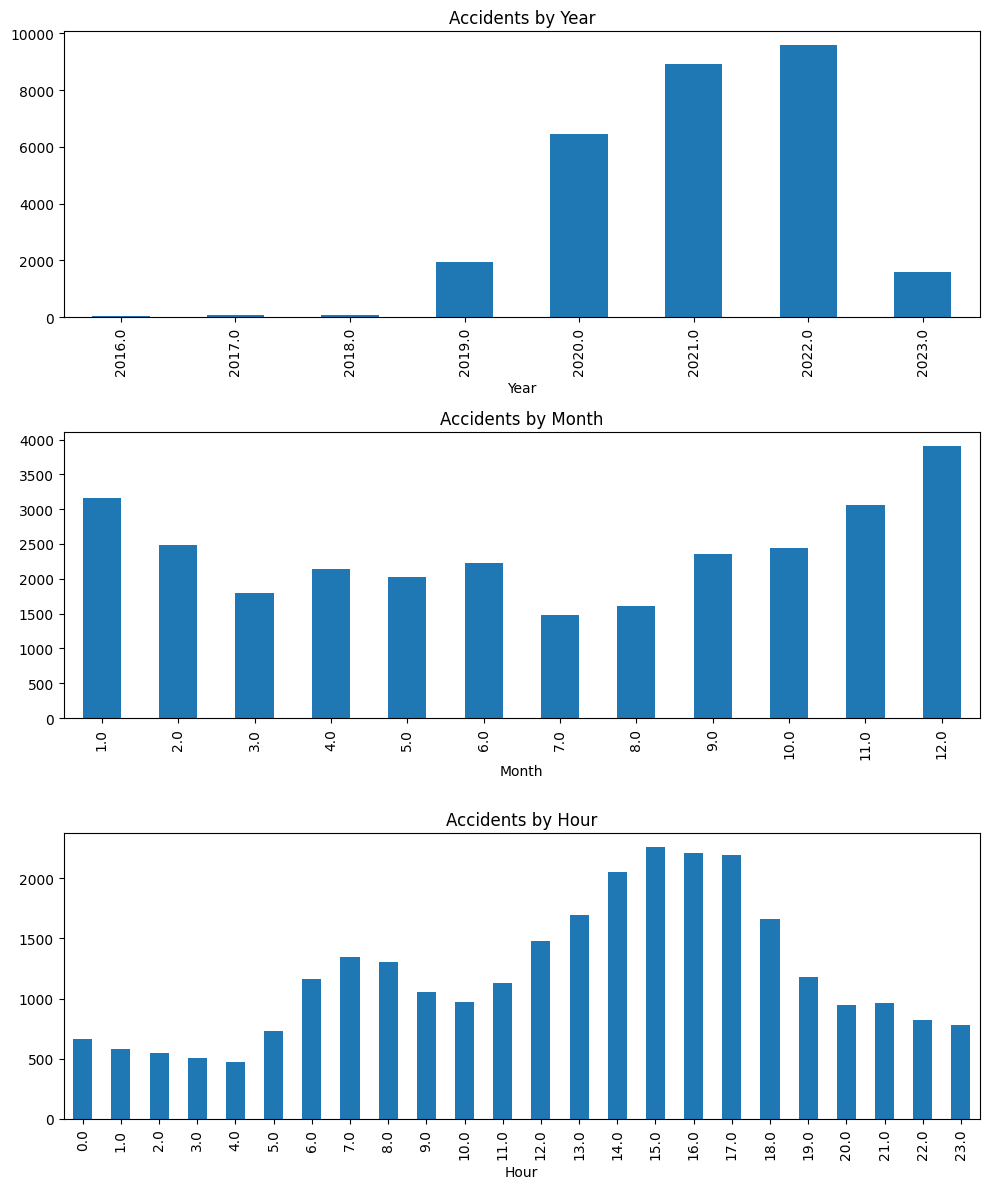

In [5]:
task2_data = df

# Convert the 'Start_Time' column to datetime format
#~~~ @This line errors because a‘Start_Time’ column has mixed date formats. ~~~
task2_data['Start_Time'] = pd.to_datetime(task2_data['Start_Time'], errors='coerce')
#~~~ ~~~

# Extract year, month, and hour from the Start_Time column
task2_data['Year'] = task2_data['Start_Time'].dt.year
task2_data['Month'] = task2_data['Start_Time'].dt.month
task2_data['Hour'] = task2_data['Start_Time'].dt.hour

# Annual analysis
annual_counts = task2_data['Year'].value_counts().sort_index()
print("Annual Analysis:")
print("Most likely year for an accident:", annual_counts.idxmax())
print("Least likely year for an accident:", annual_counts.idxmin())

# Monthly analysis
monthly_counts = task2_data.groupby('Month').size()
print("\nMonthly Analysis:")
print("Most likely month for an accident:", monthly_counts.idxmax())
print("Least likely month for an accident:", monthly_counts.idxmin())

# Daily analysis
hourly_counts = task2_data['Hour'].value_counts().sort_index()
print("\nDaily Analysis:")
print("Most likely hour for an accident:", hourly_counts.idxmax())
print("Least likely hour for an accident:", hourly_counts.idxmin())

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

annual_counts.plot(kind='bar', ax=axes[0], title='Accidents by Year')
monthly_counts.plot(kind='bar', ax=axes[1], title='Accidents by Month')
hourly_counts.plot(kind='bar', ax=axes[2], title='Accidents by Hour')

plt.tight_layout()
plt.show()

County Analysis:
Most likely county for accidents: Los Angeles

State Analysis:
Most likely state for accidents: CA

City Analysis:
Most likely city for accidents: Miami


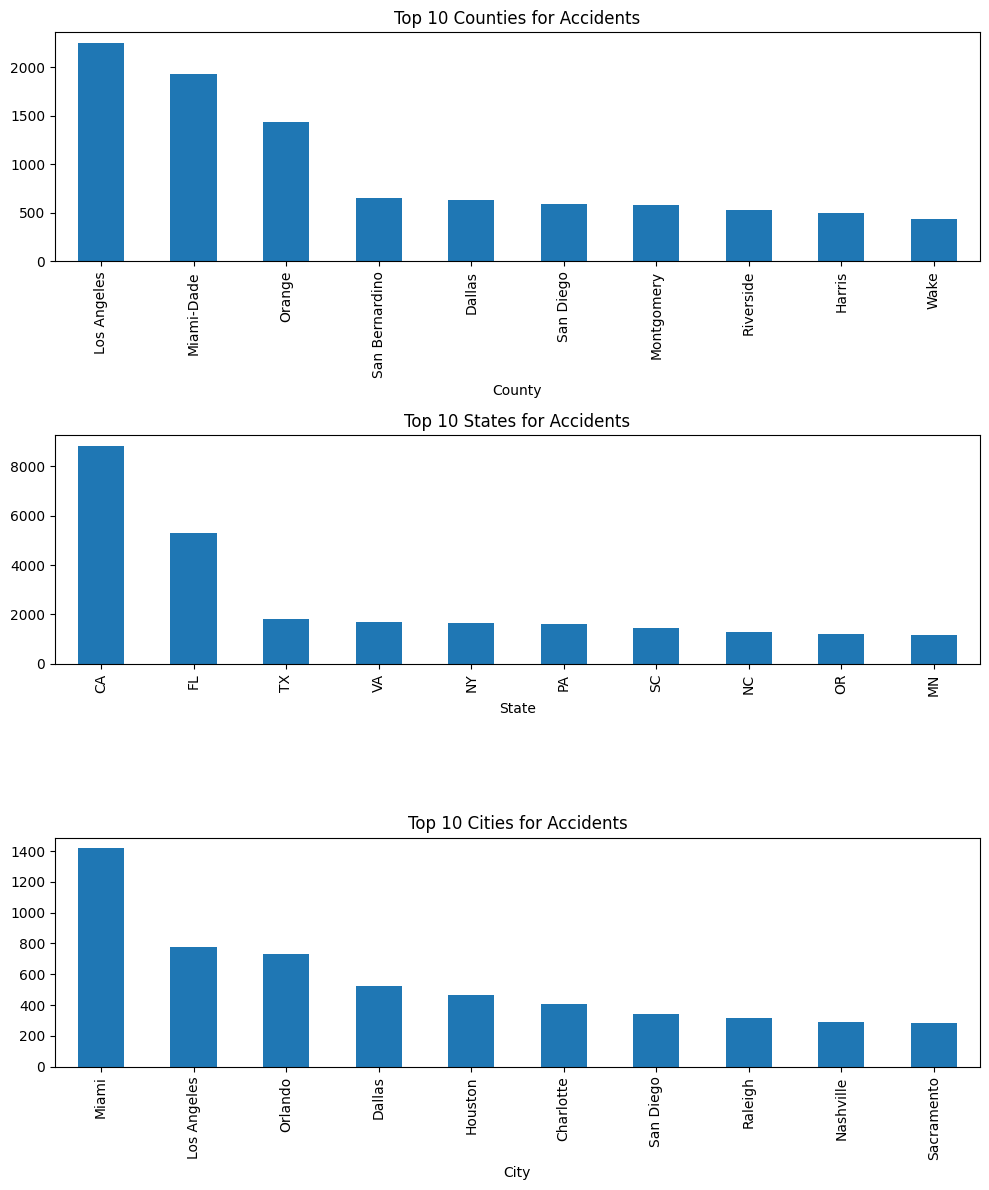

In [6]:
task2_data = df

# County analysis
county_counts = task2_data['County'].value_counts()
most_common_county = county_counts.idxmax()
print("County Analysis:")
print("Most likely county for accidents:", most_common_county)

# State analysis
state_counts = task2_data['State'].value_counts()
most_common_state = state_counts.idxmax()
print("\nState Analysis:")
print("Most likely state for accidents:", most_common_state)

# City analysis
city_counts = task2_data['City'].value_counts()
most_common_city = city_counts.idxmax()
print("\nCity Analysis:")
print("Most likely city for accidents:", most_common_city)

# Plotting (Top 10 counties, states, and cities)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

county_counts.head(10).plot(kind='bar', ax=axes[0], title='Top 10 Counties for Accidents')
state_counts.head(10).plot(kind='bar', ax=axes[1], title='Top 10 States for Accidents')
city_counts.head(10).plot(kind='bar', ax=axes[2], title='Top 10 Cities for Accidents')

plt.tight_layout()
plt.show()

Weather Analysis:
Most common weather condition at time of crash: Fair
Least common weather condition at time of crash: Scattered Clouds

Driving Conditions Analysis:
Most common crash-causing Sunrise_Sunset: Day
Least common crash-causing Sunrise_Sunset: Night
Most common crash-causing Civil_Twilight: Day
Least common crash-causing Civil_Twilight: Night
Most common crash-causing Nautical_Twilight: Day
Least common crash-causing Nautical_Twilight: Night
Most common crash-causing Astronomical_Twilight: Day
Least common crash-causing Astronomical_Twilight: Night


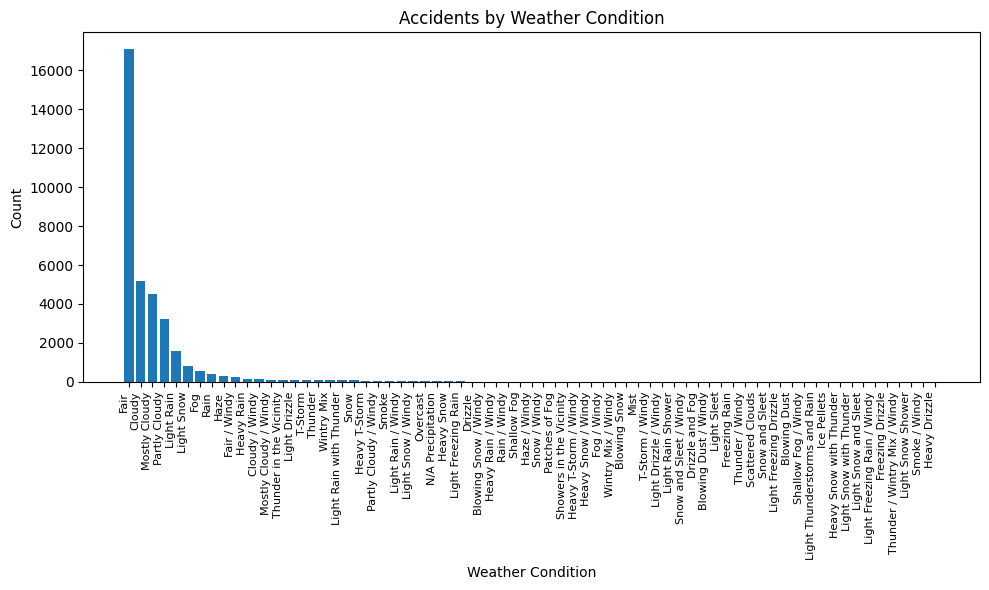

In [7]:
# Weather Conditions Analysis
weather_counts = task2_data['Weather_Condition'].value_counts()
most_common_weather = weather_counts.idxmax()
least_common_weather = weather_counts.idxmin()
print("Weather Analysis:")
print("Most common weather condition at time of crash:", most_common_weather)
print("Least common weather condition at time of crash:", least_common_weather)

# Driving conditions analysis
driving_conditions_data = {
    'Condition': ['Day', 'Night'],
    'Sunrise_Sunset': [task2_data['Sunrise_Sunset'].value_counts().idxmin(), task2_data['Sunrise_Sunset'].value_counts().idxmax()],
    'Civil_Twilight': [task2_data['Civil_Twilight'].value_counts().idxmin(), task2_data['Civil_Twilight'].value_counts().idxmax()],
    'Nautical_Twilight': [task2_data['Nautical_Twilight'].value_counts().idxmin(), task2_data['Nautical_Twilight'].value_counts().idxmax()],
    'Astronomical_Twilight': [task2_data['Astronomical_Twilight'].value_counts().idxmin(), task2_data['Astronomical_Twilight'].value_counts().idxmax()]
}
driving_conditions_df = pd.DataFrame(driving_conditions_data)

print("\nDriving Conditions Analysis:")
for column in driving_conditions_df.columns[1:]:
    most_common_condition = driving_conditions_df.loc[driving_conditions_df[column].idxmax()]
    least_common_condition = driving_conditions_df.loc[driving_conditions_df[column].idxmin()]
    print(f"Most common crash-causing {column}: {most_common_condition['Condition']}")
    print(f"Least common crash-causing {column}: {least_common_condition['Condition']}")

# Plotting (Top weather conditions)
plt.figure(figsize=(10, 6))
plt.bar(weather_counts.index, weather_counts.values)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotate labels and adjust fontsize
plt.tight_layout()
plt.show()

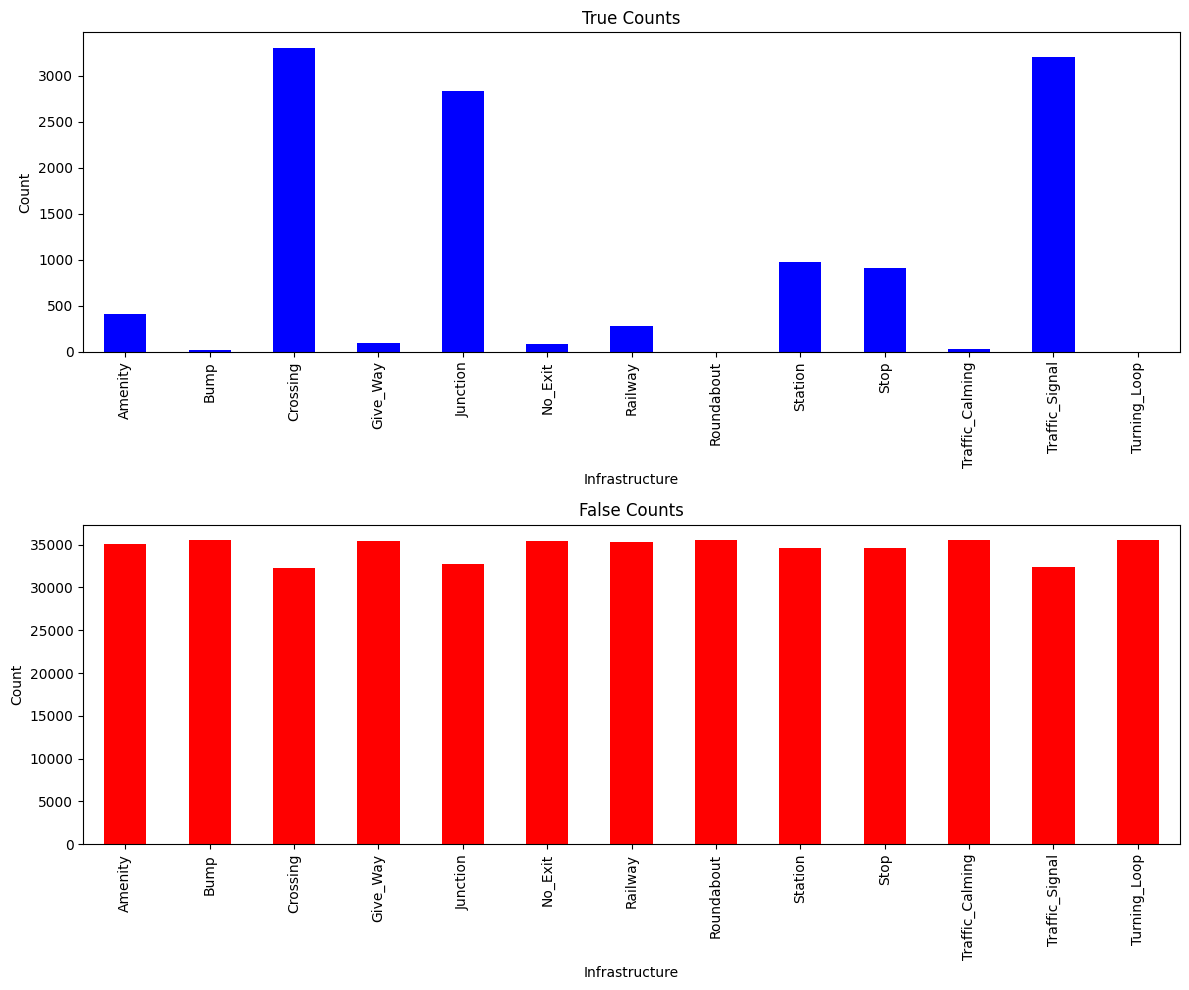

In [8]:
# Extract counts for each infrastructure type
infra_counts = {
    'Amenity': [task2_data['Amenity'].value_counts().get(True, 0), task2_data['Amenity'].value_counts().get(False, 0)],
    'Bump': [task2_data['Bump'].value_counts().get(True, 0), task2_data['Bump'].value_counts().get(False, 0)],
    'Crossing': [task2_data['Crossing'].value_counts().get(True, 0), task2_data['Crossing'].value_counts().get(False, 0)],
    'Give_Way': [task2_data['Give_Way'].value_counts().get(True, 0), task2_data['Give_Way'].value_counts().get(False, 0)],
    'Junction': [task2_data['Junction'].value_counts().get(True, 0), task2_data['Junction'].value_counts().get(False, 0)],
    'No_Exit': [task2_data['No_Exit'].value_counts().get(True, 0), task2_data['No_Exit'].value_counts().get(False, 0)],
    'Railway': [task2_data['Railway'].value_counts().get(True, 0), task2_data['Railway'].value_counts().get(False, 0)],
    'Roundabout': [task2_data['Roundabout'].value_counts().get(True, 0), task2_data['Roundabout'].value_counts().get(False, 0)],
    'Station': [task2_data['Station'].value_counts().get(True, 0), task2_data['Station'].value_counts().get(False, 0)],
    'Stop': [task2_data['Stop'].value_counts().get(True, 0), task2_data['Stop'].value_counts().get(False, 0)],
    'Traffic_Calming': [task2_data['Traffic_Calming'].value_counts().get(True, 0), task2_data['Traffic_Calming'].value_counts().get(False, 0)],
    'Traffic_Signal': [task2_data['Traffic_Signal'].value_counts().get(True, 0), task2_data['Traffic_Signal'].value_counts().get(False, 0)],
    'Turning_Loop': [task2_data['Turning_Loop'].value_counts().get(True, 0), task2_data['Turning_Loop'].value_counts().get(False, 0)]
}

# Create DataFrame from counts
infra_df = pd.DataFrame(infra_counts, index=['True_Count', 'False_Count'])

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot True counts
infra_df.loc['True_Count'].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('True Counts')
axes[0].set_xlabel('Infrastructure')
axes[0].set_ylabel('Count')

# Plot False counts
infra_df.loc['False_Count'].plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('False Counts')
axes[1].set_xlabel('Infrastructure')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Conclusion

### Time Analysis:
Annual Analysis: The most accidents occurred in 2022, while the fewest occurred in 2016.
Monthly Analysis: July saw the fewest accidents, while December saw the most.
Daily Analysis: The most accidents occurred in the afternoon, around 4:00 PM, and the fewest, around 3:00 AM.

The results indicate that the most frequent periods for accidents to happen on a yearly, monthly, and daily basis align with regular commute hours, suggesting possible trends regarding rush hours and traffic jams. It's important to take into account, nevertheless, whether these results are consistent with regional differences in traffic patterns and cultural norms around commuter behavior. 

### Location Analysis:
County Analysis: The county with the most accidents was Los Angeles County.
State Analysis: The state with the most accidents was California (CA).
City Analysis: The most accidents occurred in Miami.

Given their dense populations and heavy traffic, Los Angeles County, California, has been named the most accident-prone county, and Miami, Florida, the most accident-prone city. 

### Analysis of the Weather and Road Conditions:
Weather Analysis: Fair weather was linked to the majority of accidents, while light rain was linked to the least number of incidents.
Driving Conditions Analysis: Compared to nighttime conditions, accidents were more frequent during the day (Sunrise_Sunset: Day, Civil_Twilight: Day, Nautical_Twilight: Day, Astronomical_Twilight: Day).

Given that accidents do not strongly correspond with unfavorable weather, it is possible that other factors, such as driving conditions or human behavior, have a greater impact on the frequency of accidents. More research might look into whether specific bad weather conditions, such as snowstorms or heavy rain, have a greater effect on accidents.

### Infrastructure Analysis:
Road Infrastructure: More research may be done to ascertain which road features, such as traffic lights and roundabouts, are more frequently linked to accidents.


# Task-3: preprocessing
See prac-2. Apply one or more preprocessing techniques

In [9]:
from pandas.api.types import is_numeric_dtype, is_bool_dtype
# print(is_numeric_dtype(df['Crossing']))
print(df.dtypes)

ID                               object
Source                           object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64


In [10]:
# NOTE! unless you have a very good reason, do not drop rows nor columns
pp_data = df.copy()

print('The dataset has {} rows and {} columns'.format(pp_data.shape[0], pp_data.shape[1]))
print(pp_data.describe())

The dataset has 35546 rows and 49 columns
           Severity                     Start_Time     Start_Lat  \
count  35546.000000                          28713  35546.000000   
mean       2.074354  2021-08-01 17:49:01.451850752     36.121053   
min        1.000000            2016-02-12 23:04:14     24.570584   
25%        2.000000            2020-11-28 01:41:00     33.125762   
50%        2.000000            2021-09-19 00:51:30     36.046332   
75%        2.000000            2022-05-30 22:23:46     40.132150   
max        4.000000            2023-03-31 20:44:58     48.948856   
std        0.380953                            NaN      5.355158   

          Start_Lng       End_Lat       End_Lng  Distance(mi)  Temperature(F)  \
count  35546.000000  35546.000000  35546.000000  35546.000000    35546.000000   
mean     -95.209164     36.121268    -95.208995      0.842517       61.169710   
min     -124.486270     24.574625   -124.490620      0.000000      -33.000000   
25%     -117.548678  

In [11]:
df.dtypes.value_counts()

object            19
float64           15
bool              13
int64              1
datetime64[ns]     1
Name: count, dtype: int64

In [12]:
df['Temperature(F)'] = pd.to_numeric(df['Temperature(F)'], errors='coerce')
df['Wind_Chill(F)'] = pd.to_numeric(df['Wind_Chill(F)'], errors='coerce')
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')
df['Pressure(in)'] = pd.to_numeric(df['Pressure(in)'], errors='coerce')
df['Visibility(mi)'] = pd.to_numeric(df['Visibility(mi)'], errors='coerce')
df['Wind_Speed(mph)'] = pd.to_numeric(df['Wind_Speed(mph)'], errors='coerce')
df['Precipitation(in)'] = pd.to_numeric(df['Precipitation(in)'], errors='coerce')

In [13]:
# Fill missing values for numeric columns
fill_values = {
    'Temperature(F)': df['Temperature(F)'].median(),
    'Wind_Chill(F)': df['Wind_Chill(F)'].median(),
    'Humidity(%)': df['Humidity(%)'].median(),
    'Pressure(in)': df['Pressure(in)'].mode()[0],
    'Visibility(mi)': df['Visibility(mi)'].mode()[0],
    'Wind_Speed(mph)': df['Wind_Speed(mph)'].mode()[0],
    'Precipitation(in)': df['Precipitation(in)'].mean()}

df = df.fillna(value=fill_values)

In [14]:
# Fill missing values for categorical column
df['Weather_Condition'] = df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])

In [15]:
# Print summary statistics for 'Temperature(F)' before filling missing values
print(df['Temperature(F)'].describe())

count    35546.000000
mean        61.169710
std         19.422808
min        -33.000000
25%         48.000000
50%         63.000000
75%         76.000000
max        115.000000
Name: Temperature(F), dtype: float64


In [16]:
# Print the total number of missing values after preprocessing
print("There are {} missing values in this dataset".format(df.isnull().sum().sum()))

print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

There are 27332 missing values in this dataset
Number of instances = 35546
Number of attributes = 49
Number of missing values:
	ID: 0
	Source: 0
	Severity: 0
	Start_Time: 6833
	End_Time: 0
	Start_Lat: 0
	Start_Lng: 0
	End_Lat: 0
	End_Lng: 0
	Distance(mi): 0
	Description: 0
	Street: 0
	City: 0
	County: 0
	State: 0
	Zipcode: 0
	Country: 0
	Timezone: 0
	Airport_Code: 0
	Weather_Timestamp: 0
	Temperature(F): 0
	Wind_Chill(F): 0
	Humidity(%): 0
	Pressure(in): 0
	Visibility(mi): 0
	Wind_Direction: 0
	Wind_Speed(mph): 0
	Precipitation(in): 0
	Weather_Condition: 0
	Amenity: 0
	Bump: 0
	Crossing: 0
	Give_Way: 0
	Junction: 0
	No_Exit: 0
	Railway: 0
	Roundabout: 0
	Station: 0
	Stop: 0
	Traffic_Calming: 0
	Traffic_Signal: 0
	Turning_Loop: 0
	Sunrise_Sunset: 0
	Civil_Twilight: 0
	Nautical_Twilight: 0
	Astronomical_Twilight: 0
	Year: 6833
	Month: 6833
	Hour: 6833


In [17]:
df['ID'] = pd.to_numeric(df['ID'], errors='coerce') #convert Long attribute to numeric

print(df.dtypes.value_counts()) #HELP

object            18
float64           16
bool              13
int64              1
datetime64[ns]     1
Name: count, dtype: int64


In [18]:
numeric_attributes = df.columns[df.dtypes != "object"]
categorical_attributes = df.columns[df.dtypes == "object"]

print(numeric_attributes)
print(categorical_attributes)  

Index(['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Year', 'Month',
       'Hour'],
      dtype='object')
Index(['Source', 'End_Time', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


## Preprocessing analysis:

### Consistency:
Make certain that the numeric data types for the required columns (temperature, wind chill, humidity, pressure, visibility, wind speed, and precipitation) are saved. Numerical visualization and analysis are made simpler by consistent data formats and it makes it easier to work with later on when creating a decision tree. 
By adding in the median, mode and mean, it will make sure we use the most common value so the data will be representative.

### Errors:
Rather than generating an error, the function is instructed to convert faulty parsing to NaN (Not a Number) values by passing it the `errors='coerce'` option. 
This minimises the possibility of errors or pipeline interruptions during preprocessing by enabling the function to handle any non-numeric or missing values graciously.

### Missing data:
Missing data can negatively impact the accuracy and dependability of studies and models. It is a common problem in real-world datasets.By adding missing values, data loss and potential biases brought about by omitting incomplete records are avoided, and the dataset is kept complete and useful for further research. 

### Limitations:
Although imputed values are estimates and may introduce bias or uncertainty into the analysis, it's important to recognize that they can assist offset the impact of missing data. 
Sensitivity analysis and validation techniques can be used to find possible sources of bias or uncertainty as well as to evaluate how resilient analysis results are to imputation decisions.

# Task-4: ARM
*Apply one or more ARM techiques, see prac-3-ARM*
*Report your results based on your code output*

### Apriori Association Rules Mining

In [19]:
apri_data = df[['Severity','State','Wind_Direction','Weather_Condition','Sunrise_Sunset','Civil_Twilight','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']]
apri_data.head()

,Severity,State,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,2,CA,E,Fair,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False
1,2,CA,W,Haze,Night,Night,False,False,False,False,False,False,False,False,False,False,False,False
2,2,FL,N,Fair,Night,Night,False,False,False,False,False,False,False,False,False,False,False,False
3,2,MO,NNW,Fair,Night,Night,False,False,False,False,False,False,False,False,False,False,False,False
4,2,NY,NNW,Partly Cloudy,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
apri_data.loc[:, 'Severity'] = apri_data.loc[:, 'Severity'].astype(str)

items = set()
for col in apri_data:
    items.update(apri_data[col].unique())
    print(f"{col}: {apri_data[col].unique()}")

Severity: ['2' '1' '3' '4']
State: ['CA' 'FL' 'MO' 'NY' 'IL' 'AR' 'TX' 'TN' 'KS' 'AZ' 'LA' 'OH' 'NJ' 'WV'
 'SC' 'CT' 'MN' 'GA' 'VA' 'IN' 'NC' 'MD' 'CO' 'MI' 'PA' 'NE' 'MT' 'AL'
 'MS' 'OR' 'WI' 'ID' 'UT' 'WA' 'ME' 'DE' 'SD' 'DC' 'KY' 'NM' 'RI' 'OK'
 'WY' 'IA' 'NH' 'NV' 'ND' 'MA' 'VT']
Wind_Direction: ['E' 'W' 'N' 'NNW' 'NNE' 'ESE' 'SSE' 'NW' 'CALM' 'S' 'SW' 'NE' 'SE' 'WSW'
 'VAR' 'WNW' 'ENE' 'SSW' 'Variable' 'East' 'West' 'North' 'South']
Weather_Condition: ['Fair' 'Haze' 'Partly Cloudy' 'Mostly Cloudy' 'Cloudy' 'Light Rain'
 'Light Snow' 'Light Drizzle' 'Fog' 'Blowing Snow / Windy'
 'Thunder in the Vicinity' 'Drizzle' 'Thunder' 'Drizzle and Fog'
 'Heavy T-Storm' 'Heavy Rain' 'Mostly Cloudy / Windy' 'Cloudy / Windy'
 'Rain' 'Haze / Windy' 'Fair / Windy' 'T-Storm' 'Overcast'
 'Light Rain with Thunder' 'Snow' 'N/A Precipitation' 'Smoke'
 'Partly Cloudy / Windy' 'Light Freezing Rain' 'Heavy T-Storm / Windy'
 'Patches of Fog' 'Light Rain / Windy' 'Wintry Mix' 'Snow / Windy'
 'Light Snow / W

/tmp/ipykernel_33/2194771301.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2' '2' '2' ... '2' '2' '2']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  apri_data.loc[:, 'Severity'] = apri_data.loc[:, 'Severity'].astype(str)


In [21]:
apri_data = pd.get_dummies(apri_data)

itemset = set(apri_data.columns)
encoded_vals = []

for index, row in apri_data.iterrows():
    labels = {}
    for item in itemset:
        labels[item] = row[item]
    encoded_vals.append(labels)

ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,State_AR,Weather_Condition_Overcast,State_VT,State_MA,Weather_Condition_Fog / Windy,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Light Freezing Rain / Windy,State_NH,State_LA,State_OR,...,Wind_Direction_VAR,Traffic_Calming,Weather_Condition_Light Rain Shower,State_MS,Weather_Condition_Heavy T-Storm,State_NM,Weather_Condition_Fog,Weather_Condition_Light Sleet,Weather_Condition_Thunder / Wintry Mix / Windy,Weather_Condition_Drizzle
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.sort_values(by='support', ascending=False)

Processing 4 combinations | Sampling itemset size 43


,support,itemsets
6,0.941766,(Severity_2)
1,0.689360,(Civil_Twilight_Day)
0,0.648934,(Sunrise_Sunset_Day)
7,0.648934,"(Sunrise_Sunset_Day, Civil_Twilight_Day)"
11,0.647218,"(Severity_2, Civil_Twilight_Day)"
18,0.608986,"(Sunrise_Sunset_Day, Severity_2, Civil_Twiligh..."
9,0.608986,"(Sunrise_Sunset_Day, Severity_2)"
5,0.480898,(Weather_Condition_Fair)
16,0.455916,"(Weather_Condition_Fair, Severity_2)"
3,0.351066,(Sunrise_Sunset_Night)


In [23]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)
rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,(Civil_Twilight_Night),"(Severity_2, Sunrise_Sunset_Night)",0.310640,0.332780,0.294548,0.948198,2.849323,0.191173,12.880144,0.941510
19,"(Severity_2, Sunrise_Sunset_Night)",(Civil_Twilight_Night),0.332780,0.310640,0.294548,0.885113,2.849323,0.191173,6.000326,0.972752
6,(Civil_Twilight_Night),(Sunrise_Sunset_Night),0.310640,0.351066,0.310640,1.000000,2.848465,0.201585,inf,0.941357
22,(Sunrise_Sunset_Night),"(Severity_2, Civil_Twilight_Night)",0.351066,0.294548,0.294548,0.839010,2.848465,0.191142,4.381950,1.000000
20,"(Severity_2, Civil_Twilight_Night)",(Sunrise_Sunset_Night),0.294548,0.351066,0.294548,1.000000,2.848465,0.191142,inf,0.919884
5,(Sunrise_Sunset_Night),(Civil_Twilight_Night),0.351066,0.310640,0.310640,0.884847,2.848465,0.201585,5.986449,1.000000
28,"(Weather_Condition_Fair, Civil_Twilight_Day)","(Sunrise_Sunset_Day, Severity_2)",0.324931,0.608986,0.289737,0.891688,1.464219,0.091859,3.610086,0.469644
27,"(Weather_Condition_Fair, Sunrise_Sunset_Day)","(Severity_2, Civil_Twilight_Day)",0.306167,0.647218,0.289737,0.946338,1.462164,0.091581,6.574195,0.455559
11,"(Weather_Condition_Fair, Civil_Twilight_Day)",(Sunrise_Sunset_Day),0.324931,0.648934,0.306167,0.942251,1.451999,0.095308,6.079183,0.461130
26,"(Weather_Condition_Fair, Severity_2, Civil_Twi...",(Sunrise_Sunset_Day),0.307545,0.648934,0.289737,0.942097,1.451761,0.090161,6.062964,0.449389


# Conclusion of ARM

### Confidence:

The relationship between (Severity_2, Sunrise_Sunset_Day) -> (Civil_Twilight_Day) has a confidence level of 1.0, meaning that accidents with severity level 2 that happen during the daytime hours will always result in civil twilight. This relationship is further supported by the lift value of 1.450620.

### Interpretation
There is a high correlation between accidents of severity level 2 occurring during daylight hours and the civil twilight being during the day, according to the rule (Severity_2, Sunrise_Sunset_Day) -> (Civil_Twilight_Day). This implies that there is a greater likelihood of more serious accidents occurring during daylight and civil twilight.
Additionally, the rule (Weather_Condition_Fair, Sunrise_Sunset_Day) -> (Civil_Twilight_Day) implies a relationship between daylight, fine weather, and the time of civil nightfall.

# Task-5: Classification
## JOSHUA TBD

In [24]:
# apply one or more classification methods, see pracs-4 and 5
# Report your results based on your code output

In [25]:
task5_data = df.copy()
task5_data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Hour
0,NaN,Source1,2,2022-12-21 09:02:00,2022-12-21 10:21:40,34.289223,-118.226219,34.293250,-118.233746,0.512,...,False,False,False,Day,Day,Day,Day,2022.0,12.0,9.0
1,NaN,Source1,2,2021-10-07 00:37:00,2021-10-07 09:22:08,34.168714,-117.457098,34.154324,-117.474498,1.406,...,False,False,False,Night,Night,Night,Night,2021.0,10.0,0.0
2,NaN,Source1,2,2022-10-11 04:04:00,2022-10-11 04:24:00,30.448455,-85.890184,30.449426,-85.893223,0.193,...,False,False,False,Night,Night,Night,Night,2022.0,10.0,4.0
3,NaN,Source1,2,2020-10-29 19:40:05,2020-10-29 21:58:06,37.138233,-93.309881,37.138253,-93.310975,0.060,...,False,False,False,Night,Night,Night,Day,2020.0,10.0,19.0
4,NaN,Source1,2,2020-05-07 11:44:13,2020-05-07 12:14:13,41.548000,-73.588800,41.548000,-73.588800,0.000,...,False,False,False,Day,Day,Day,Day,2020.0,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35541,NaN,Source1,2,2022-09-19 08:06:00,2022-09-19 10:28:45,34.282406,-118.783728,34.282673,-118.788149,0.253,...,False,False,False,Day,Day,Day,Day,2022.0,9.0,8.0
35542,NaN,Source1,2,2022-11-14 17:23:45,2022-11-14 18:40:37,42.245644,-87.901276,42.249927,-87.901261,0.296,...,False,False,False,Night,Night,Day,Day,2022.0,11.0,17.0
35543,NaN,Source1,2,2021-01-16 22:30:00,2021-01-17 00:45:00,47.368479,-122.294047,47.357489,-122.296816,0.770,...,False,False,False,Night,Night,Night,Night,2021.0,1.0,22.0
35544,NaN,Source1,2,2022-12-22 21:41:05,2022-12-22 22:58:46,45.126332,-93.390023,45.122842,-93.389203,0.244,...,False,False,False,Night,Night,Night,Night,2022.0,12.0,21.0


In [26]:
# Create subset including only desired attributes
task5_subset1 = task5_data[['Start_Lat', 'Start_Lng', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Weather_Condition']]
task5_subset1 = task5_subset1.copy()
task5_subset1

,Start_Lat,Start_Lng,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition
0,34.289223,-118.226219,Day,Day,Day,Day,Fair
1,34.168714,-117.457098,Night,Night,Night,Night,Haze
2,30.448455,-85.890184,Night,Night,Night,Night,Fair
3,37.138233,-93.309881,Night,Night,Night,Day,Fair
4,41.548000,-73.588800,Day,Day,Day,Day,Partly Cloudy
...,...,...,...,...,...,...,...
35541,34.282406,-118.783728,Day,Day,Day,Day,Fair
35542,42.245644,-87.901276,Night,Night,Day,Day,Cloudy
35543,47.368479,-122.294047,Night,Night,Night,Night,Light Rain
35544,45.126332,-93.390023,Night,Night,Night,Night,Fair


In [27]:
conditions_to_group = {
    'Fair Conditions': ['Fair', 'Fair / Windy'],
    'Cloudy Conditions': ['Cloudy', 'Mostly Cloudy', 'Mostly Cloudy / Windy', 'Cloudy / Windy', 'Partly Cloudy', 'Partly Cloudy / Windy', 'Overcast', 'Scattered Clouds'],
    'Rainy Conditions': ['Light Rain', 'Rain', 'Heavy Rain', 'Light Drizzle', 'Drizzle', 'Light Rain with Thunder', 'Rain / Windy', 'Light Rain / Windy', 'Heavy Rain / Windy', 'Light Rain Shower', 'Light Thunderstorms and Rain', 'Thunder in the Vicinity', 'Thunder'],
    'Snowy Conditions': ['Light Snow', 'Snow', 'Heavy Snow', 'Light Snow / Windy', 'Snow / Windy', 'Light Snow Shower', 'Light Snow with Thunder', 'Snow and Sleet', 'Snow and Sleet / Windy', 'Ice Pellets', 'Wintry Mix', 'Wintry Mix / Windy', 'Light Snow and Sleet', 'Heavy Snow with Thunder'],
    'Other Atmospheric Conditions': ['Fog', 'Haze', 'Smoke', 'Blowing Dust', 'Blowing Dust / Windy', 'Smoke / Windy', 'Haze / Windy', 'Mist', 'Blowing Snow', 'Blowing Snow / Windy', 'Patches of Fog', 'Shallow Fog', 'Fog / Windy', 'Shallow Fog / Windy'],
    'Thunderstorm Related': ['Thunder / Windy', 'T-Storm / Windy', 'Thunder / Wintry Mix / Windy', 'Heavy T-Storm / Windy']
}

# Create a new column 'Weather_Condition_New' based on the mapping
task5_subset1['Weather_Condition_New'] = task5_subset1['Weather_Condition'].apply(lambda x: next((k for k, v in conditions_to_group.items() if x in v), 'Unknown'))
task5_subset1

,Start_Lat,Start_Lng,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition,Weather_Condition_New
0,34.289223,-118.226219,Day,Day,Day,Day,Fair,Fair Conditions
1,34.168714,-117.457098,Night,Night,Night,Night,Haze,Other Atmospheric Conditions
2,30.448455,-85.890184,Night,Night,Night,Night,Fair,Fair Conditions
3,37.138233,-93.309881,Night,Night,Night,Day,Fair,Fair Conditions
4,41.548000,-73.588800,Day,Day,Day,Day,Partly Cloudy,Cloudy Conditions
...,...,...,...,...,...,...,...,...
35541,34.282406,-118.783728,Day,Day,Day,Day,Fair,Fair Conditions
35542,42.245644,-87.901276,Night,Night,Day,Day,Cloudy,Cloudy Conditions
35543,47.368479,-122.294047,Night,Night,Night,Night,Light Rain,Rainy Conditions
35544,45.126332,-93.390023,Night,Night,Night,Night,Fair,Fair Conditions


In [28]:
Y = task5_subset1['Weather_Condition_New']
X = task5_subset1.drop(['Start_Lat', 'Start_Lng', 'Weather_Condition', 'Weather_Condition_New'],axis=1)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables to numerical values
# Y['Weather_Condition_New'] = label_encoder.fit_transform(Y['Weather_Condition_New'])
X['Sunrise_Sunset'] = label_encoder.fit_transform(X['Sunrise_Sunset'])
X['Civil_Twilight'] = label_encoder.fit_transform(X['Civil_Twilight'])
X['Nautical_Twilight'] = label_encoder.fit_transform(X['Nautical_Twilight'])
X['Astronomical_Twilight'] = label_encoder.fit_transform(X['Astronomical_Twilight'])


clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

In [29]:
print(Y.unique())

['Fair Conditions' 'Other Atmospheric Conditions' 'Cloudy Conditions'
 'Rainy Conditions' 'Snowy Conditions' 'Unknown' 'Thunderstorm Related']


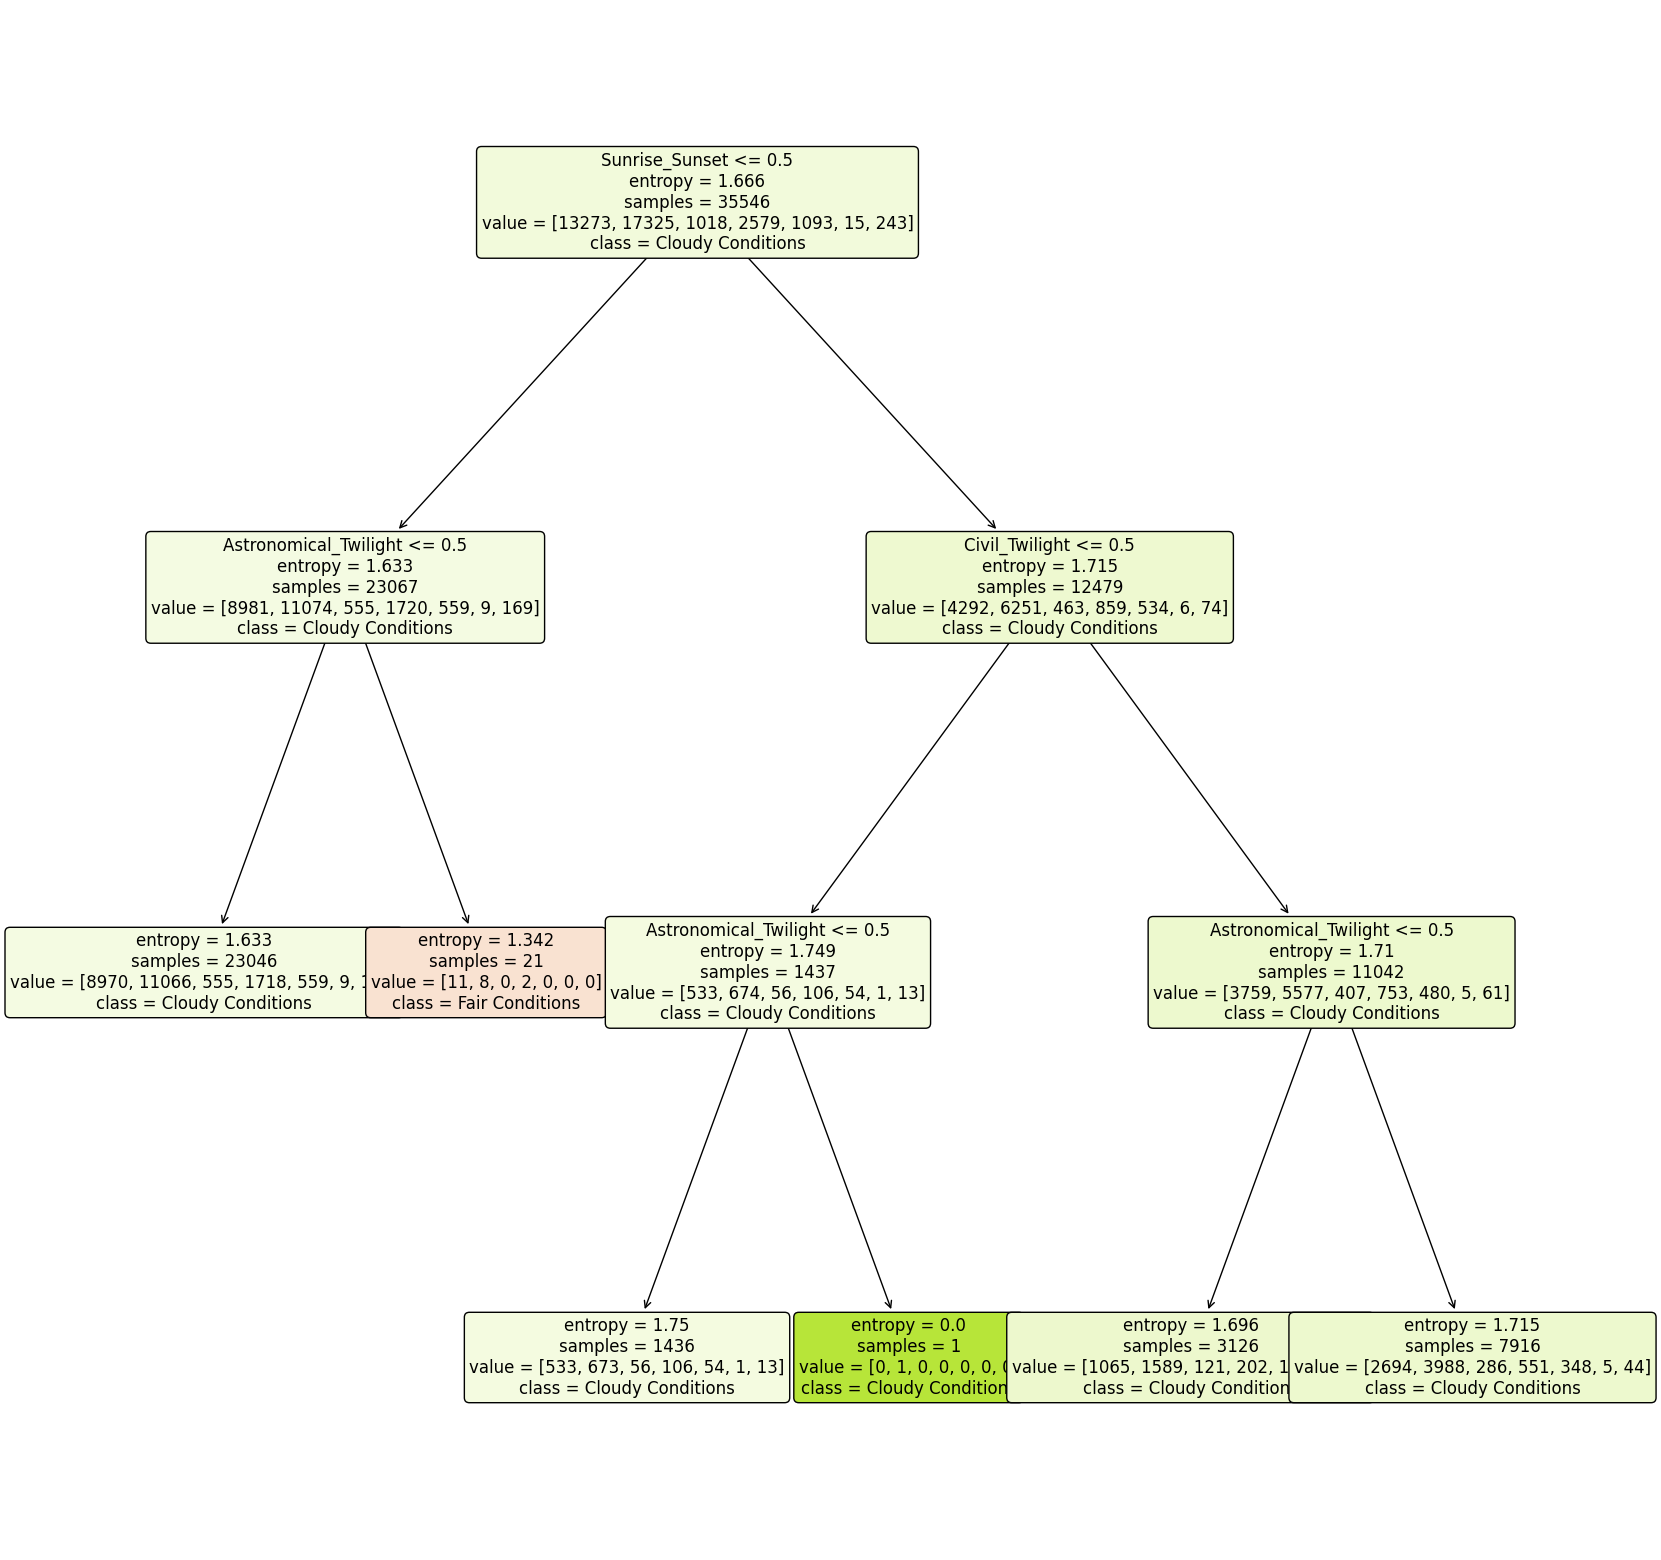

In [30]:
# Define feature names and class names
feature_names = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
class_names = ['Fair Conditions', 'Cloudy Conditions', 'Rainy Conditions', 'Snowy Conditions', 'Other Atmospheric Conditions', 'Thunderstorm Related']

# Plot the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=12)
plt.show()

In [31]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

print(tree_rules)

|--- Sunrise_Sunset <= 0.50
|   |--- Astronomical_Twilight <= 0.50
|   |   |--- class: Fair Conditions
|   |--- Astronomical_Twilight >  0.50
|   |   |--- class: Cloudy Conditions
|--- Sunrise_Sunset >  0.50
|   |--- Civil_Twilight <= 0.50
|   |   |--- Astronomical_Twilight <= 0.50
|   |   |   |--- class: Fair Conditions
|   |   |--- Astronomical_Twilight >  0.50
|   |   |   |--- class: Fair Conditions
|   |--- Civil_Twilight >  0.50
|   |   |--- Astronomical_Twilight <= 0.50
|   |   |   |--- class: Fair Conditions
|   |   |--- Astronomical_Twilight >  0.50
|   |   |   |--- class: Fair Conditions



In [32]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(X,Y,
                                                 test_size = 0.4,
                                                 random_state = 42)
      
clf = clf.fit(X_train, y_train)
test_pred_decision_tree = clf.predict(test_x)

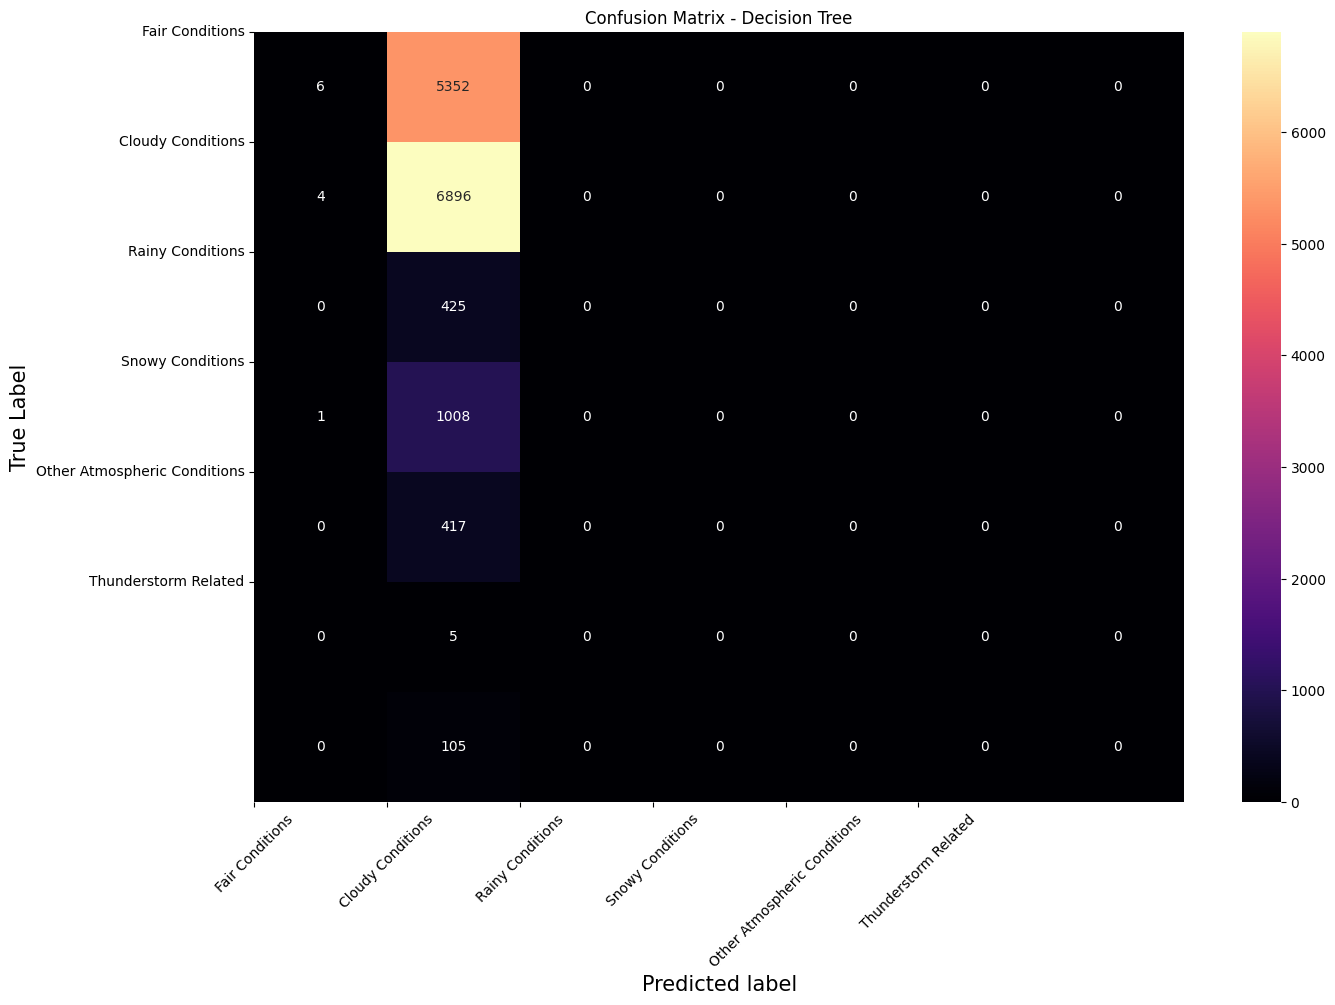

In [33]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)

# Plot the result
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_df, annot=True, fmt=".0f", cmap="magma")

# Set axis titles
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True Label", fontsize=15)

# Set axis tick labels
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=range(len(class_names)), labels=class_names, rotation=0)

plt.show()


In [34]:
print(metrics.classification_report(test_lab,
                                    test_pred_decision_tree))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                              precision    recall  f1-score   support

           Cloudy Conditions       0.55      0.00      0.00      5358
             Fair Conditions       0.49      1.00      0.65      6900
Other Atmospheric Conditions       0.00      0.00      0.00       425
            Rainy Conditions       0.00      0.00      0.00      1009
            Snowy Conditions       0.00      0.00      0.00       417
        Thunderstorm Related       0.00      0.00      0.00         5
                     Unknown       0.00      0.00      0.00       105

                    accuracy                           0.49     14219
                   macro avg       0.15      0.14      0.09     14219
                weighted avg       0.44      0.49      0.32     14219



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Accuracy')

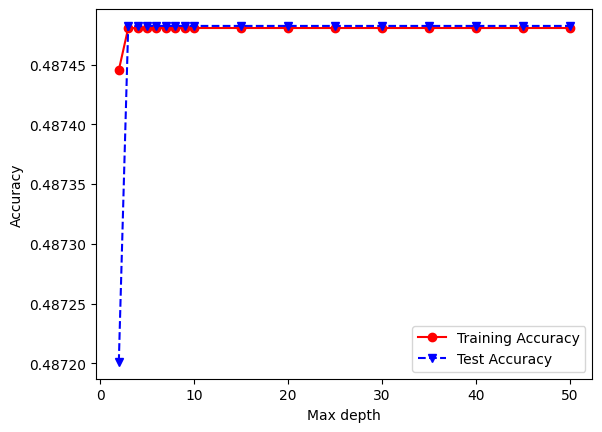

In [35]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

# Task-6: Clustering

In [36]:
clust_data = df.copy()
clust_columns = clust_data.describe()
clust_columns.columns

Index(['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Year', 'Month', 'Hour'],
      dtype='object')

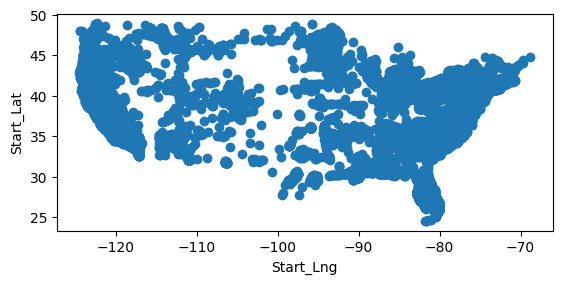

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("Start_Lng")
plt.ylabel("Start_Lat")
plt.scatter(clust_data['Start_Lng'], clust_data['Start_Lat'])
plt.gca().set_aspect('equal', adjustable='box') 
plt.show()

Based on the visual plot of the spatial data we can assume there are somewhere between 3 and 5 apparent clusterss. We will use the elbow method to more accurately depict the number of clusters and support or deny the initial assumption.

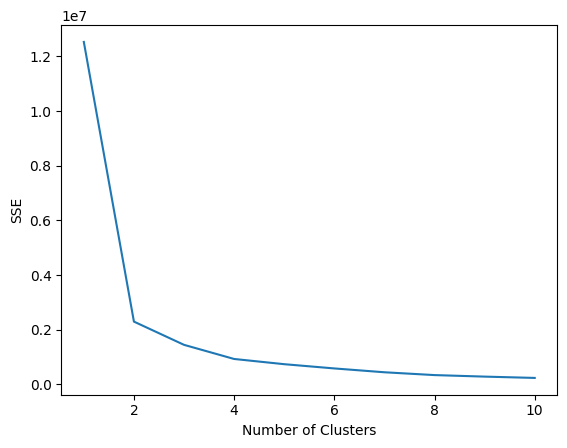

In [38]:
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

kmean_data = clust_data[['Start_Lng','Start_Lat']]

numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SSE = []
for k in numClusters:
    k_means = KMeans(n_clusters=k, n_init=10)  # Set n_init explicitly
    k_means.fit(kmean_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

The K value corresponding to the point the graph starts to move almost parallel to the X-axis is the optimal K value or an optimal number of clusters. 

This example shows the biggest drop in the SSE is from 1->2 clusters, while there is an insignificant drop from 2->4. This quite heavily denies the visual assumption of 3 or more  clusters.

To further assist us with determining the optimal value of k, we can use the silhouette analysis technique.

For n_clusters = 2 The average silhouette_score is : 0.7172174563848346


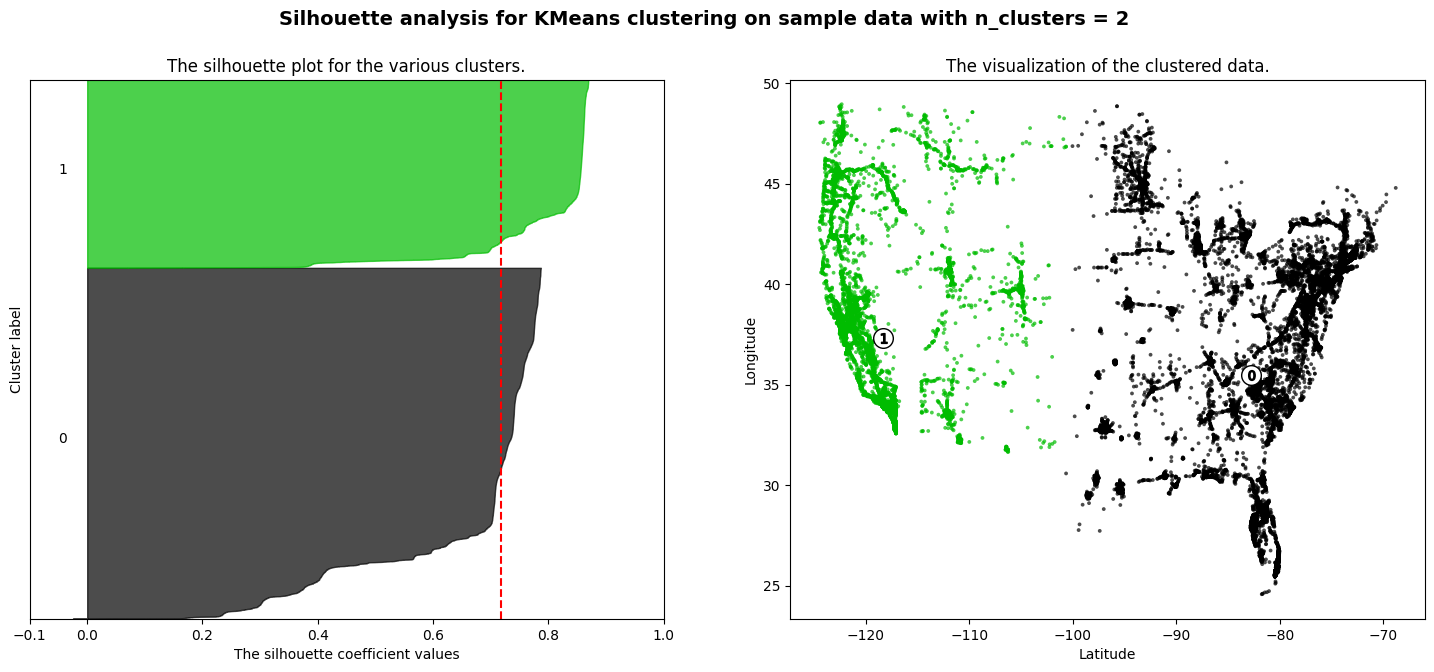

For n_clusters = 3 The average silhouette_score is : 0.5635006799540597


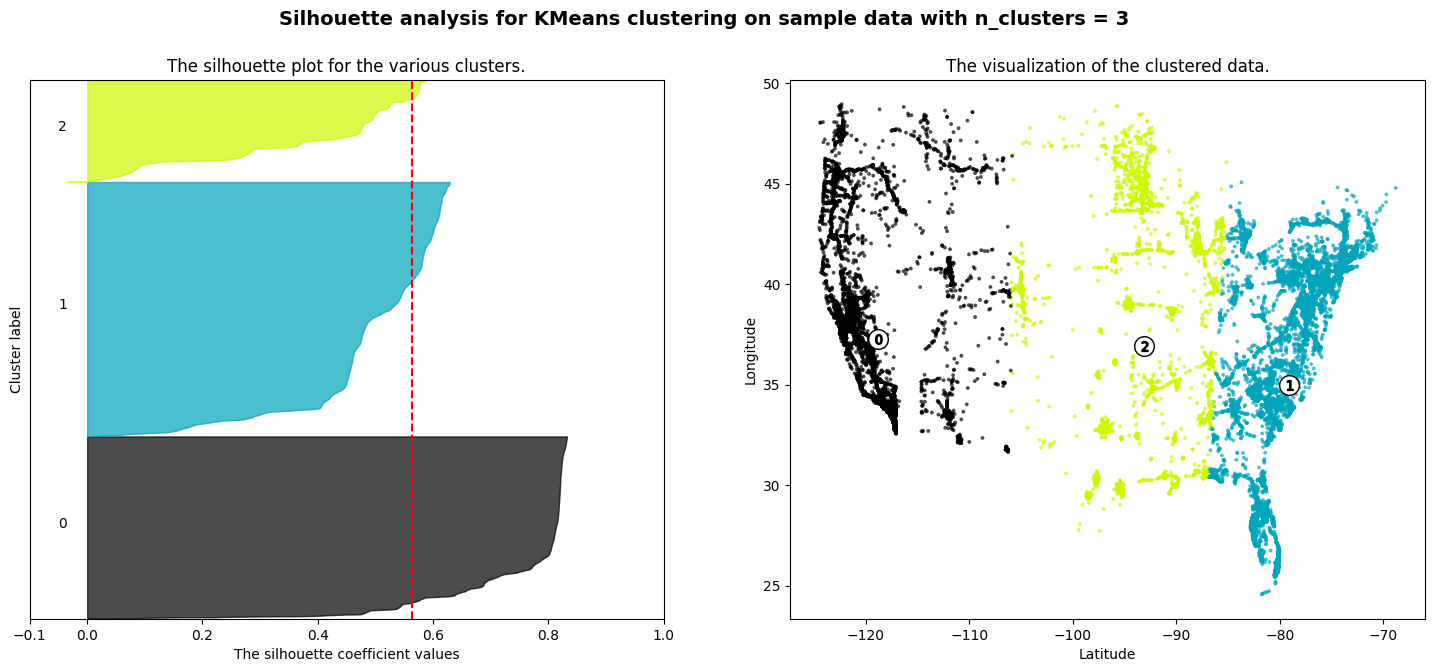

For n_clusters = 4 The average silhouette_score is : 0.5873284989362914


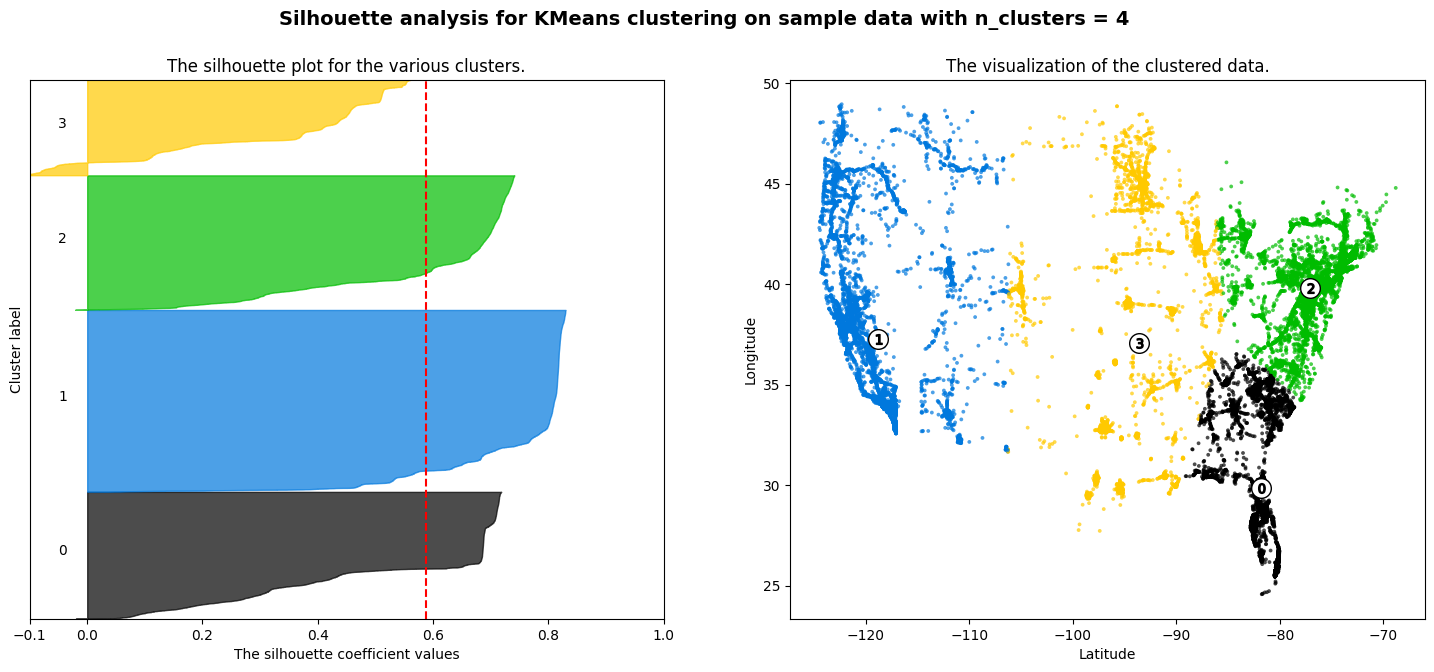

For n_clusters = 5 The average silhouette_score is : 0.6071683027209565


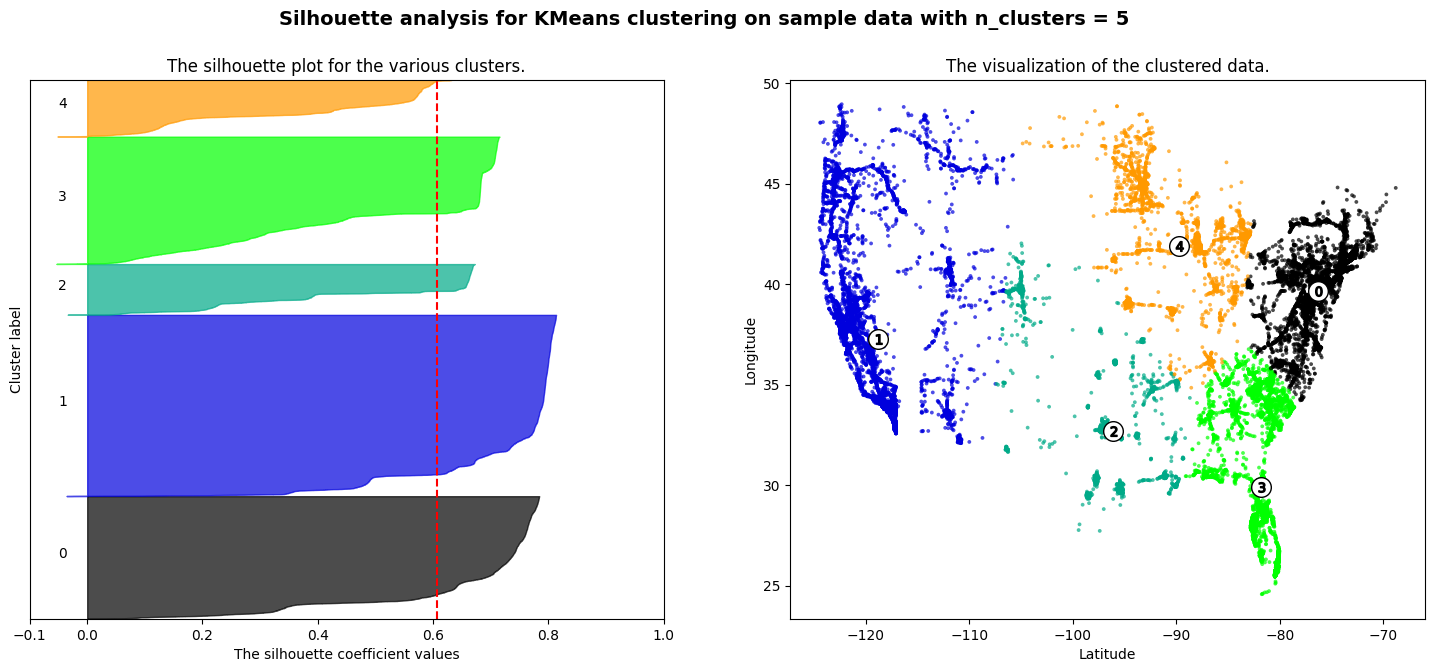

For n_clusters = 6 The average silhouette_score is : 0.5394538169608735


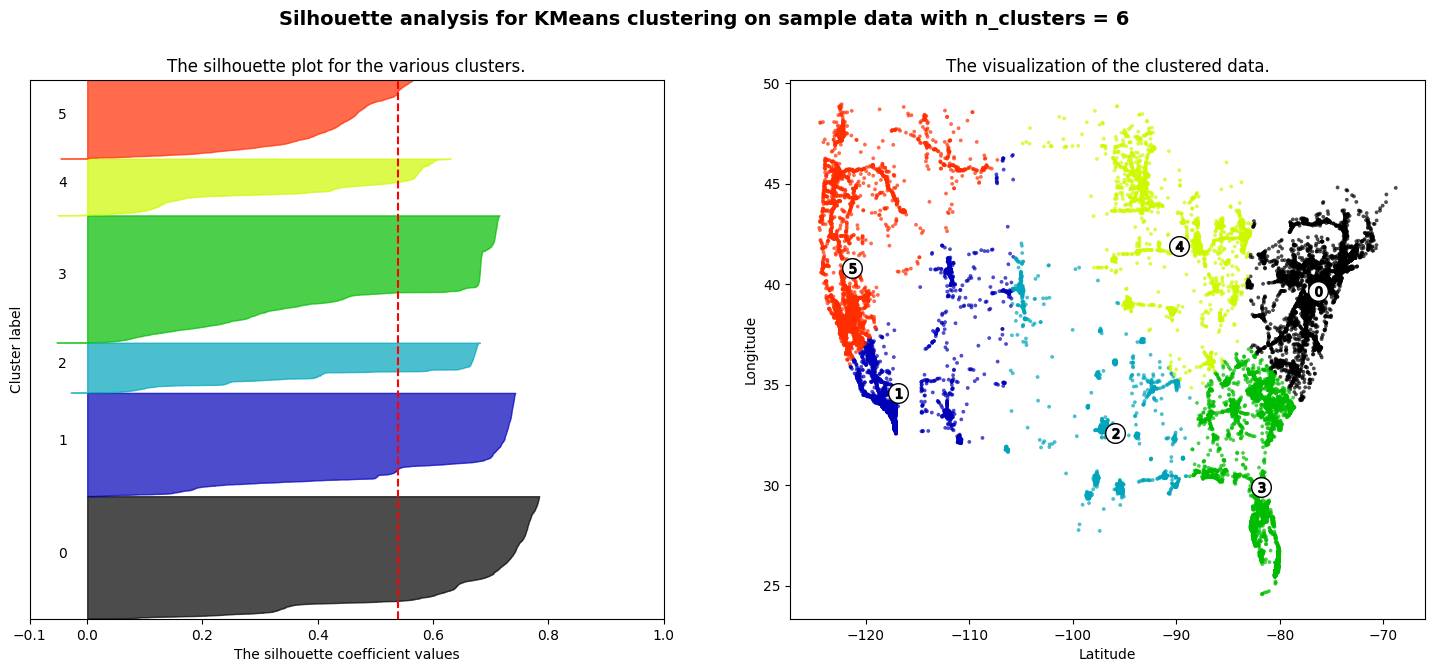

In [39]:
import warnings
import matplotlib.cm as cm
warnings.filterwarnings("ignore", category=FutureWarning)

X = kmean_data.copy()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0],
        X.iloc[:, 1],
        marker=".",
        s=30,
        lw=0,
        alpha=0.7,
        c=colors,
        edgecolor="k",
    )

    # Labelling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Latitude")
    ax2.set_ylabel("Longitude")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

## Analysis of K-Means Clustering Results

### Silhouette Scores
The average silhouette scores for different values of k (number of clusters) are as follows:

- For n_clusters = 3, the average silhouette score is 0.5635.
- For n_clusters = 4, the average silhouette score is 0.5873.
- For n_clusters = 5, the average silhouette score is 0.6072.
- For n_clusters = 6, the average silhouette score is 0.5395.

### Interpretation
- The silhouette score measures how similar an object is to its own cluster compared to other clusters. The value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- Higher silhouette scores suggest better-defined clusters.
- From the trend of the silhouette scores, it seems that the silhouette score initially increases as the number of clusters increases up to a certain point (in this case, up to k=5), and then decreases for k=6.
- The peak silhouette score occurs at k=5, indicating that this might be the optimal number of clusters according to this metric.

### Conclusion
- Based on the silhouette scores alone, k=5 appears to be the optimal number of clusters for this dataset.
- Examining the silhouette plots and scatterplot visualizations shows that that the clusters are decently defined, but could be further separated into more meaningful clusters. Perhaps more than 6 clusters should be tested.
- The limitations of k-means, such as sensitivity to noise, the need to specify k, and its suitability for globular clusters, shows that it may not be the best for visualising this feature of the dataset.

# Task-7: Project specific and final results
# Data Analysis Summary

An examination of US auto accident statistics provides important new information in a number of areas. The results of clustering analysis point to k=5 as the best clustering, with links showing significant relationships between weather, time of day, and accident severity. Preprocessing fixes missing values and guarantees data consistency, which improves the dependability of ensuing analysis. In specific areas, including Los Angeles and Miami, and during rush hours, accidents are more common. Daytime driving and pleasant weather are also associated with a greater accident frequency. These results provide insightful information for improving traffic safety protocol. 


